In [0]:
#Implementing a classification algorithm in databricks using machine learning

In [0]:
#import mlflow and autolog machin learning runs

import mlflow

mlflow.pyspark.ml.autolog()

In [0]:
#listing the contents of the dbfs directory
dbutils.fs.ls("dbfs:/FileStore/tables")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1681303567000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1678537754000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677679998000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679499480000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1

In [0]:
#read data into spark DataFrame

faultDF = spark.read.csv("/FileStore/tables/FaultDataset.csv",
                            header = "true",
                            inferSchema = "true")

In [0]:
#Using display to view the fault DataFrame 
faultDF.display()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 fault_detected 0.3503125 0.3496875 0.35 0.3459375 0.3475 0.3459375 0.341875 0.3434375 0.355 0.3553125 0.3459375 0.3525 0.3575 0.3590625 0.35875 0.3484375 0.3590625 0.35 0.3559375 0.3490625 0 0.5090625 0.484375 0.046875 0.071875 0.06 0.0634375 0.0575 0.0546875 0.0559375 0.058125 0.0628125 0.065625 0.0640625 0.0634375 0.0534375 0.084375 0.0615625 0.05375 0.076875 0.056875 0 0.0928125 0.0975 0.1096875 0.1025 0.09625 0.1053125 0.09875 0.098125 0.091875 0.0909375 0.09875 0.103125 0.1 0.1034375 0.1015625 0.0978125 0.0990625 0.10375 0.098125 0.1040625 0 0.09375 0.089375 0.091875 0.0996875 0.0909375 0.096875 0.0940625 0.096875 0.096875 0.099375 0.099375 0.0959375 0.0959375 0.0940625 0.09125 0.0996875 0.09375 0.0934375 0.0971875 0.094375 0 0.036875 0.0440625 0.038125 0.0428125 0.0353125 0.0340625 0.033125 0.0403125 0.0346875 0.036875 0.035625 0.03625 0.0409375 0.039375 0.035 0.040625 0.0384375 0.036875 0.04 0.0371875 0 0.135625 0.3034375 0.13875 0.140625 0.126875 0.130625 0.139375 0.143125 0.1290625 0.140625 0.1340625 0.1396875 0.1384375 0.1453125 0.1453125 0.1496875 0.1440625 0.1359375 0.1453125 0.14625 0 0.3446875 0.35125 0.3353125 0.3471875 0.34625 0.348125 0.3478125 0.3521875 0.3525 0.35125 0.3571875 0.360625 0.3640625 0.36625 0.3640625 0.3634375 0.3475 0.35375 0.1575 0.351875 0 0.036875 0.035625 0.03125 0.0375 0.0390625 0.034375 0.0315625 0.031875 0.0378125 0.0321875 0.0371875 0.038125 0.035 0.0353125 0.0325 0.03 0.0325 0.0321875 0.0321875 0.03125 0 0.0371875 0.039375 0.033125 0.04 0.04125 0.03875 0.035625 0.0384375 0.0378125 0.0365625 0.033125 0.0365625 0.03375 0.034375 0.0346875 0.04125 0.0365625 0.035 0.034375 0.0396875 0 0.3590625 0.3609375 0.360625 0.3590625 0.355 0.365 0.355625 0.358125 0.3575 0.3578125 0.355625 0.3584375 0.3521875 0.3459375 0.3521875 0.3509375 0.3525 0.35625 0.353125 0.3540625 0 0.034375 0.03875 0.0396875 0.0315625 0.0346875 0.0271875 0.0346875 0.036875 0.0340625 0.0321875 0.034375 0.0303125 0.0334375 0.038125 0.03625 0.0378125 0.035625 0.034375 0.035625 0.030625 0 0.0328125 0.031875 0.0359375 0.035625 0.0334375 0.033125 0.03125 0.0353125 0.0353125 0.0346875 0.0371875 0.036875 0.03375 0.029375 0.0325 0.0384375 0.0309375 0.039375 0.033125 0.0325 0 0.034375 0.03375 0.0390625 0.0334375 0.0428125 0.0340625 0.0365625 0.03625 0.0325 0.035625 0.04 0.204375 0.169375 0.1671875 0.1734375 0.1796875 0.1928125 0.190625 0.186875 0.1896875 0 0.034375 0.0325 0.0328125 0.0396875 0.031875 0.036875 0.0334375 0.03875 0.0384375 0.031875 0.035 0.038125 0.04 0.036875 0.03875 0.0409375 0.03875 0.035625 0.038125 0.033125 0 0.0353125 0.0334375 0.033125 0.035 0.0371875 0.03625 0.0346875 0.0378125 0.031875 0.0328125 0.0334375 0.034375 0.0378125 0.0384375 0.03125 0.0328125 0.0353125 0.03125 0.03 0.0340625 0 0.125625 0.1309375 0.148125 0.1378125 0.1315625 0.1309375 0.1415625 0.1425 0.1428125 0.155 0.140625 0.144375 0.135625 0.143125 0.1428125 0.13875 0.139375 0.1409375 0.140625 0.136875 0 0.3559375 0.3525 0.355 0.3621875 0.3515625 0.3659375 0.3528125 0.358125 0.3578125 0.3625 0.3628125 0.36 0.3534375 0.3615625 0.35625 0.3521875 0.3515625 0.3578125 0.3559375 0.3571875 0 0.035625 0.0321875 0.0359375 0.040625 0.035 0.036875 0.0334375 0.035 0.0378125 0.0328125 0.0365625 0.035 0.03625 0.040625 0.0359375 0.035625 0.0384375 0.0359375 0.0365625 0.0365625 0 0.0928125 0.0971875 0.0903125 0.0984375 0.09375 0.0978125 0.0971875 0.090625 0.1034375 0.091875 0.0984375 0.0934375 0.095625 0.101875 0.094375 0.0928125 0.09875 0.09375 0.0953125 0.0903125 0 0.1078125 0.1246875 0.1409375 0.128125 0.129375 0.101875 0.101875 0.111875 0.1171875 0.136875 0.1321875 0.1278125 0.1284375 0.133125 0.13875 0.13375 0.13 0.1290625 0.141875 0.1409375 0 0.3821875 0.3771875 0.3809375 0.38125 0.38 0.380625 0.375 0.3821875 0.379375 0.3740625 0.3625 0.3740625 0.101875 0.3709375 0.139375 0.1365625 0.3709375 0.19 0.14625 0.145625 0 0.3803125 0.3815625 0.3875 0.381875 0.379375 0.376875 0.3784375 0.379375 0.381875 0.3884375 0.3868

In [0]:
faultDF.display(10)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 fault_detected 0.3503125 0.3496875 0.35 0.3459375 0.3475 0.3459375 0.341875 0.3434375 0.355 0.3553125 0.3459375 0.3525 0.3575 0.3590625 0.35875 0.3484375 0.3590625 0.35 0.3559375 0.3490625 0 0.5090625 0.484375 0.046875 0.071875 0.06 0.0634375 0.0575 0.0546875 0.0559375 0.058125 0.0628125 0.065625 0.0640625 0.0634375 0.0534375 0.084375 0.0615625 0.05375 0.076875 0.056875 0 0.0928125 0.0975 0.1096875 0.1025 0.09625 0.1053125 0.09875 0.098125 0.091875 0.0909375 0.09875 0.103125 0.1 0.1034375 0.1015625 0.0978125 0.0990625 0.10375 0.098125 0.1040625 0 0.09375 0.089375 0.091875 0.0996875 0.0909375 0.096875 0.0940625 0.096875 0.096875 0.099375 0.099375 0.0959375 0.0959375 0.0940625 0.09125 0.0996875 0.09375 0.0934375 0.0971875 0.094375 0 0.036875 0.0440625 0.038125 0.0428125 0.0353125 0.0340625 0.033125 0.0403125 0.0346875 0.036875 0.035625 0.03625 0.0409375 0.039375 0.035 0.040625 0.0384375 0.036875 0.04 0.0371875 0 0.135625 0.3034375 0.13875 0.140625 0.126875 0.130625 0.139375 0.143125 0.1290625 0.140625 0.1340625 0.1396875 0.1384375 0.1453125 0.1453125 0.1496875 0.1440625 0.1359375 0.1453125 0.14625 0 0.3446875 0.35125 0.3353125 0.3471875 0.34625 0.348125 0.3478125 0.3521875 0.3525 0.35125 0.3571875 0.360625 0.3640625 0.36625 0.3640625 0.3634375 0.3475 0.35375 0.1575 0.351875 0 0.036875 0.035625 0.03125 0.0375 0.0390625 0.034375 0.0315625 0.031875 0.0378125 0.0321875 0.0371875 0.038125 0.035 0.0353125 0.0325 0.03 0.0325 0.0321875 0.0321875 0.03125 0 0.0371875 0.039375 0.033125 0.04 0.04125 0.03875 0.035625 0.0384375 0.0378125 0.0365625 0.033125 0.0365625 0.03375 0.034375 0.0346875 0.04125 0.0365625 0.035 0.034375 0.0396875 0 0.3590625 0.3609375 0.360625 0.3590625 0.355 0.365 0.355625 0.358125 0.3575 0.3578125 0.355625 0.3584375 0.3521875 0.3459375 0.3521875 0.3509375 0.3525 0.35625 0.353125 0.3540625 0 0.034375 0.03875 0.0396875 0.0315625 0.0346875 0.0271875 0.0346875 0.036875 0.0340625 0.0321875 0.034375 0.0303125 0.0334375 0.038125 0.03625 0.0378125 0.035625 0.034375 0.035625 0.030625 0 0.0328125 0.031875 0.0359375 0.035625 0.0334375 0.033125 0.03125 0.0353125 0.0353125 0.0346875 0.0371875 0.036875 0.03375 0.029375 0.0325 0.0384375 0.0309375 0.039375 0.033125 0.0325 0 0.034375 0.03375 0.0390625 0.0334375 0.0428125 0.0340625 0.0365625 0.03625 0.0325 0.035625 0.04 0.204375 0.169375 0.1671875 0.1734375 0.1796875 0.1928125 0.190625 0.186875 0.1896875 0 0.034375 0.0325 0.0328125 0.0396875 0.031875 0.036875 0.0334375 0.03875 0.0384375 0.031875 0.035 0.038125 0.04 0.036875 0.03875 0.0409375 0.03875 0.035625 0.038125 0.033125 0 0.0353125 0.0334375 0.033125 0.035 0.0371875 0.03625 0.0346875 0.0378125 0.031875 0.0328125 0.0334375 0.034375 0.0378125 0.0384375 0.03125 0.0328125 0.0353125 0.03125 0.03 0.0340625 0 0.125625 0.1309375 0.148125 0.1378125 0.1315625 0.1309375 0.1415625 0.1425 0.1428125 0.155 0.140625 0.144375 0.135625 0.143125 0.1428125 0.13875 0.139375 0.1409375 0.140625 0.136875 0 0.3559375 0.3525 0.355 0.3621875 0.3515625 0.3659375 0.3528125 0.358125 0.3578125 0.3625 0.3628125 0.36 0.3534375 0.3615625 0.35625 0.3521875 0.3515625 0.3578125 0.3559375 0.3571875 0 0.035625 0.0321875 0.0359375 0.040625 0.035 0.036875 0.0334375 0.035 0.0378125 0.0328125 0.0365625 0.035 0.03625 0.040625 0.0359375 0.035625 0.0384375 0.0359375 0.0365625 0.0365625 0 0.0928125 0.0971875 0.0903125 0.0984375 0.09375 0.0978125 0.0971875 0.090625 0.1034375 0.091875 0.0984375 0.0934375 0.095625 0.101875 0.094375 0.0928125 0.09875 0.09375 0.0953125 0.0903125 0 0.1078125 0.1246875 0.1409375 0.128125 0.129375 0.101875 0.101875 0.111875 0.1171875 0.136875 0.1321875 0.1278125 0.1284375 0.133125 0.13875 0.13375 0.13 0.1290625 0.141875 0.1409375 0 0.3821875 0.3771875 0.3809375 0.38125 0.38 0.380625 0.375 0.3821875 0.379375 0.3740625 0.3625 0.3740625 0.101875 0.3709375 0.139375 0.1365625 0.3709375 0.19 0.14625 0.145625 0 0.3803125 0.3815625 0.3875 0.381875 0.379375 0.376875 0.3784375 0.379375 0.381875 0.3884375 0.3868

In [0]:
#Statistical analysis of all columns in fault dataframe
for col in faultDF.columns:

    faultDF.describe([col]).show()

+-------+-------------------+
|summary|                  1|
+-------+-------------------+
|  count|               9292|
|   mean|0.34162330499354226|
| stddev|0.28919489486260785|
|    min|           0.024375|
|    max|          1.0809375|
+-------+-------------------+

+-------+-------------------+
|summary|                  2|
+-------+-------------------+
|  count|               9292|
|   mean|0.34263116121394677|
| stddev| 0.2890875372793958|
|    min|           0.024375|
|    max|          1.2134375|
+-------+-------------------+

+-------+-------------------+
|summary|                  3|
+-------+-------------------+
|  count|               9292|
|   mean| 0.3421213812957383|
| stddev|0.28916422490616933|
|    min|           0.024375|
|    max|          1.0809375|
+-------+-------------------+

+-------+-------------------+
|summary|                  4|
+-------+-------------------+
|  count|               9292|
|   mean|0.34213907124407966|
| stddev|0.28916356333107296|
|    mi

In [0]:
faultDF.select('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','fault_detected').describe().toPandas()

summary 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 fault_detected 
 
 
 
 
 0 
 count 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 9292 
 
 
 1 
 mean 
 0.34162330499354226 
 0.34263116121394677 
 0.3421213812957383 
 0.34213907124407966 
 0.3428434405940584 
 0.3428279366659492 
 0.3427147008179088 
 0.34306577566724017 
 0.34317299155187225 
 0.3439251842983209 
 0.3441075320167876 
 0.34398424047567727 
 0.3441183275936292 
 0.3448787599547991 
 0.34489994753551373 
 0.3458342525828662 
 0.34563488753766686 
 0.3457525290572536 
 0.3465221427034015 
 0.346670724817048 
 0.5 
 
 
 2 
 stddev 
 0.28919489486260785 
 0.2890875372793958 
 0.28916422490616933 
 0.28916356333107296 
 0.2889646554403878 
 0.2890889899729543 
 0.2891948159883224 
 0.28919185608065456 
 0.2893401858067147 
 0.289011538534877 
 0.28920014487495876 
 0.2890708129465896 
 0.28911804701463106 
 0.2889821392646809 
 0.2891314011350137 
 0.2888285654988746 
 0.28892040336707314 
 0.28915028148431343 
 0.2887705775702368 
 0.28900135543931055 
 0.5000269070362092 
 
 
 3 
 min 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.025 
 0.025 
 0.025 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.025 
 0 
 
 
 4 
 max 
 1.0809375 
 1.2134375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.2134375 
 1.0809375 
 1.2134375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1.0809375 
 1

In [0]:
quantile = faultDF.approxQuantile(['1'], [0.25, 0.5, 0.75], 0)
quantile_25 = quantile[0][0]
quantile_50 = quantile[0][1]
quantile_75 = quantile[0][2]
print('quantile_25: '+str(quantile_25))
print('quantile_50: '+str(quantile_50))
print('quantile_75: '+str(quantile_75))

quantile_25: 0.0640625
quantile_50: 0.3421875
quantile_75: 0.6184375


In [0]:
quantile = faultDF.approxQuantile(['5'], [0.25, 0.5, 0.75], 0)
quantile_25 = quantile[0][0]
quantile_50 = quantile[0][1]
quantile_75 = quantile[0][2]
print('quantile_25: '+str(quantile_25))
print('quantile_50: '+str(quantile_50))
print('quantile_75: '+str(quantile_75))

quantile_25: 0.065
quantile_50: 0.3434375
quantile_75: 0.6190625


In [0]:
quantile = faultDF.approxQuantile(['10'], [0.25, 0.5, 0.75], 0)
quantile_25 = quantile[0][0]
quantile_50 = quantile[0][1]
quantile_75 = quantile[0][2]
print('quantile_25: '+str(quantile_25))
print('quantile_50: '+str(quantile_50))
print('quantile_75: '+str(quantile_75))

quantile_25: 0.0659375
quantile_50: 0.345
quantile_75: 0.62


In [0]:
quantile = faultDF.approxQuantile(['fault_detected'], [0.25, 0.5, 0.75], 0)
quantile_25 = quantile[0][0]
quantile_50 = quantile[0][1]
quantile_75 = quantile[0][2]
print('quantile_25: '+str(quantile_25))
print('quantile_50: '+str(quantile_50))
print('quantile_75: '+str(quantile_75))

quantile_25: 0.0
quantile_50: 0.0
quantile_75: 1.0


In [0]:
from pyspark.mllib.stat import Statistics

# select variables to check correlation
df_features = faultDF.select('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','fault_detected') 

# create RDD table for correlation calculation
rdd_table = df_features.rdd.map(lambda row: row[0:])

# get the correlation matrix
corr_mat=Statistics.corr(rdd_table, method="pearson")

In [0]:
corr_mat.view()

Out[12]: array([[1.        , 0.8438467 , 0.81577988, 0.82666069, 0.81972683,
        0.80682008, 0.80060935, 0.8006671 , 0.78555992, 0.7810984 ,
        0.78122761, 0.77265753, 0.77319108, 0.77880816, 0.77073395,
        0.75867928, 0.76533692, 0.75726828, 0.75253469, 0.75178114,
        0.66702782],
       [0.8438467 , 1.        , 0.84315337, 0.81379446, 0.82491664,
        0.81847783, 0.80611451, 0.79976934, 0.79817506, 0.78585552,
        0.7788667 , 0.78027178, 0.77188076, 0.77278215, 0.77702634,
        0.76956963, 0.75752177, 0.76409631, 0.75821748, 0.75119368,
        0.66613049],
       [0.81577988, 0.84315337, 1.        , 0.84422461, 0.81546374,
        0.82604472, 0.8187616 , 0.80670674, 0.79966233, 0.80106661,
        0.78595526, 0.7808954 , 0.78071157, 0.77426519, 0.7725136 ,
        0.77745856, 0.77054379, 0.75906264, 0.76677191, 0.75799044,
        0.66846312],
       [0.82666069, 0.81379446, 0.84422461, 1.        , 0.844152  ,
        0.81540372, 0.82589795, 0.8211631 , 

In [0]:
import seaborn as sns

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [0]:
faultDF.createOrReplaceTempView("faultView")

In [0]:
%sql

SELECT * FROM faultView

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 fault_detected 0.3503125 0.3496875 0.35 0.3459375 0.3475 0.3459375 0.341875 0.3434375 0.355 0.3553125 0.3459375 0.3525 0.3575 0.3590625 0.35875 0.3484375 0.3590625 0.35 0.3559375 0.3490625 0 0.5090625 0.484375 0.046875 0.071875 0.06 0.0634375 0.0575 0.0546875 0.0559375 0.058125 0.0628125 0.065625 0.0640625 0.0634375 0.0534375 0.084375 0.0615625 0.05375 0.076875 0.056875 0 0.0928125 0.0975 0.1096875 0.1025 0.09625 0.1053125 0.09875 0.098125 0.091875 0.0909375 0.09875 0.103125 0.1 0.1034375 0.1015625 0.0978125 0.0990625 0.10375 0.098125 0.1040625 0 0.09375 0.089375 0.091875 0.0996875 0.0909375 0.096875 0.0940625 0.096875 0.096875 0.099375 0.099375 0.0959375 0.0959375 0.0940625 0.09125 0.0996875 0.09375 0.0934375 0.0971875 0.094375 0 0.036875 0.0440625 0.038125 0.0428125 0.0353125 0.0340625 0.033125 0.0403125 0.0346875 0.036875 0.035625 0.03625 0.0409375 0.039375 0.035 0.040625 0.0384375 0.036875 0.04 0.0371875 0 0.135625 0.3034375 0.13875 0.140625 0.126875 0.130625 0.139375 0.143125 0.1290625 0.140625 0.1340625 0.1396875 0.1384375 0.1453125 0.1453125 0.1496875 0.1440625 0.1359375 0.1453125 0.14625 0 0.3446875 0.35125 0.3353125 0.3471875 0.34625 0.348125 0.3478125 0.3521875 0.3525 0.35125 0.3571875 0.360625 0.3640625 0.36625 0.3640625 0.3634375 0.3475 0.35375 0.1575 0.351875 0 0.036875 0.035625 0.03125 0.0375 0.0390625 0.034375 0.0315625 0.031875 0.0378125 0.0321875 0.0371875 0.038125 0.035 0.0353125 0.0325 0.03 0.0325 0.0321875 0.0321875 0.03125 0 0.0371875 0.039375 0.033125 0.04 0.04125 0.03875 0.035625 0.0384375 0.0378125 0.0365625 0.033125 0.0365625 0.03375 0.034375 0.0346875 0.04125 0.0365625 0.035 0.034375 0.0396875 0 0.3590625 0.3609375 0.360625 0.3590625 0.355 0.365 0.355625 0.358125 0.3575 0.3578125 0.355625 0.3584375 0.3521875 0.3459375 0.3521875 0.3509375 0.3525 0.35625 0.353125 0.3540625 0 0.034375 0.03875 0.0396875 0.0315625 0.0346875 0.0271875 0.0346875 0.036875 0.0340625 0.0321875 0.034375 0.0303125 0.0334375 0.038125 0.03625 0.0378125 0.035625 0.034375 0.035625 0.030625 0 0.0328125 0.031875 0.0359375 0.035625 0.0334375 0.033125 0.03125 0.0353125 0.0353125 0.0346875 0.0371875 0.036875 0.03375 0.029375 0.0325 0.0384375 0.0309375 0.039375 0.033125 0.0325 0 0.034375 0.03375 0.0390625 0.0334375 0.0428125 0.0340625 0.0365625 0.03625 0.0325 0.035625 0.04 0.204375 0.169375 0.1671875 0.1734375 0.1796875 0.1928125 0.190625 0.186875 0.1896875 0 0.034375 0.0325 0.0328125 0.0396875 0.031875 0.036875 0.0334375 0.03875 0.0384375 0.031875 0.035 0.038125 0.04 0.036875 0.03875 0.0409375 0.03875 0.035625 0.038125 0.033125 0 0.0353125 0.0334375 0.033125 0.035 0.0371875 0.03625 0.0346875 0.0378125 0.031875 0.0328125 0.0334375 0.034375 0.0378125 0.0384375 0.03125 0.0328125 0.0353125 0.03125 0.03 0.0340625 0 0.125625 0.1309375 0.148125 0.1378125 0.1315625 0.1309375 0.1415625 0.1425 0.1428125 0.155 0.140625 0.144375 0.135625 0.143125 0.1428125 0.13875 0.139375 0.1409375 0.140625 0.136875 0 0.3559375 0.3525 0.355 0.3621875 0.3515625 0.3659375 0.3528125 0.358125 0.3578125 0.3625 0.3628125 0.36 0.3534375 0.3615625 0.35625 0.3521875 0.3515625 0.3578125 0.3559375 0.3571875 0 0.035625 0.0321875 0.0359375 0.040625 0.035 0.036875 0.0334375 0.035 0.0378125 0.0328125 0.0365625 0.035 0.03625 0.040625 0.0359375 0.035625 0.0384375 0.0359375 0.0365625 0.0365625 0 0.0928125 0.0971875 0.0903125 0.0984375 0.09375 0.0978125 0.0971875 0.090625 0.1034375 0.091875 0.0984375 0.0934375 0.095625 0.101875 0.094375 0.0928125 0.09875 0.09375 0.0953125 0.0903125 0 0.1078125 0.1246875 0.1409375 0.128125 0.129375 0.101875 0.101875 0.111875 0.1171875 0.136875 0.1321875 0.1278125 0.1284375 0.133125 0.13875 0.13375 0.13 0.1290625 0.141875 0.1409375 0 0.3821875 0.3771875 0.3809375 0.38125 0.38 0.380625 0.375 0.3821875 0.379375 0.3740625 0.3625 0.3740625 0.101875 0.3709375 0.139375 0.1365625 0.3709375 0.19 0.14625 0.145625 0 0.3803125 0.3815625 0.3875 0.381875 0.379375 0.376875 0.3784375 0.379375 0.381875 0.3884375 0.3868

In [0]:
%sql

SELECT DISTINCT(COUNT(fault_detected)) as Fault_count
FROM faultView
GROUP BY fault_detected

Fault_count 4646

In [0]:
display(faultDF)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 fault_detected 0.3503125 0.3496875 0.35 0.3459375 0.3475 0.3459375 0.341875 0.3434375 0.355 0.3553125 0.3459375 0.3525 0.3575 0.3590625 0.35875 0.3484375 0.3590625 0.35 0.3559375 0.3490625 0 0.5090625 0.484375 0.046875 0.071875 0.06 0.0634375 0.0575 0.0546875 0.0559375 0.058125 0.0628125 0.065625 0.0640625 0.0634375 0.0534375 0.084375 0.0615625 0.05375 0.076875 0.056875 0 0.0928125 0.0975 0.1096875 0.1025 0.09625 0.1053125 0.09875 0.098125 0.091875 0.0909375 0.09875 0.103125 0.1 0.1034375 0.1015625 0.0978125 0.0990625 0.10375 0.098125 0.1040625 0 0.09375 0.089375 0.091875 0.0996875 0.0909375 0.096875 0.0940625 0.096875 0.096875 0.099375 0.099375 0.0959375 0.0959375 0.0940625 0.09125 0.0996875 0.09375 0.0934375 0.0971875 0.094375 0 0.036875 0.0440625 0.038125 0.0428125 0.0353125 0.0340625 0.033125 0.0403125 0.0346875 0.036875 0.035625 0.03625 0.0409375 0.039375 0.035 0.040625 0.0384375 0.036875 0.04 0.0371875 0 0.135625 0.3034375 0.13875 0.140625 0.126875 0.130625 0.139375 0.143125 0.1290625 0.140625 0.1340625 0.1396875 0.1384375 0.1453125 0.1453125 0.1496875 0.1440625 0.1359375 0.1453125 0.14625 0 0.3446875 0.35125 0.3353125 0.3471875 0.34625 0.348125 0.3478125 0.3521875 0.3525 0.35125 0.3571875 0.360625 0.3640625 0.36625 0.3640625 0.3634375 0.3475 0.35375 0.1575 0.351875 0 0.036875 0.035625 0.03125 0.0375 0.0390625 0.034375 0.0315625 0.031875 0.0378125 0.0321875 0.0371875 0.038125 0.035 0.0353125 0.0325 0.03 0.0325 0.0321875 0.0321875 0.03125 0 0.0371875 0.039375 0.033125 0.04 0.04125 0.03875 0.035625 0.0384375 0.0378125 0.0365625 0.033125 0.0365625 0.03375 0.034375 0.0346875 0.04125 0.0365625 0.035 0.034375 0.0396875 0 0.3590625 0.3609375 0.360625 0.3590625 0.355 0.365 0.355625 0.358125 0.3575 0.3578125 0.355625 0.3584375 0.3521875 0.3459375 0.3521875 0.3509375 0.3525 0.35625 0.353125 0.3540625 0 0.034375 0.03875 0.0396875 0.0315625 0.0346875 0.0271875 0.0346875 0.036875 0.0340625 0.0321875 0.034375 0.0303125 0.0334375 0.038125 0.03625 0.0378125 0.035625 0.034375 0.035625 0.030625 0 0.0328125 0.031875 0.0359375 0.035625 0.0334375 0.033125 0.03125 0.0353125 0.0353125 0.0346875 0.0371875 0.036875 0.03375 0.029375 0.0325 0.0384375 0.0309375 0.039375 0.033125 0.0325 0 0.034375 0.03375 0.0390625 0.0334375 0.0428125 0.0340625 0.0365625 0.03625 0.0325 0.035625 0.04 0.204375 0.169375 0.1671875 0.1734375 0.1796875 0.1928125 0.190625 0.186875 0.1896875 0 0.034375 0.0325 0.0328125 0.0396875 0.031875 0.036875 0.0334375 0.03875 0.0384375 0.031875 0.035 0.038125 0.04 0.036875 0.03875 0.0409375 0.03875 0.035625 0.038125 0.033125 0 0.0353125 0.0334375 0.033125 0.035 0.0371875 0.03625 0.0346875 0.0378125 0.031875 0.0328125 0.0334375 0.034375 0.0378125 0.0384375 0.03125 0.0328125 0.0353125 0.03125 0.03 0.0340625 0 0.125625 0.1309375 0.148125 0.1378125 0.1315625 0.1309375 0.1415625 0.1425 0.1428125 0.155 0.140625 0.144375 0.135625 0.143125 0.1428125 0.13875 0.139375 0.1409375 0.140625 0.136875 0 0.3559375 0.3525 0.355 0.3621875 0.3515625 0.3659375 0.3528125 0.358125 0.3578125 0.3625 0.3628125 0.36 0.3534375 0.3615625 0.35625 0.3521875 0.3515625 0.3578125 0.3559375 0.3571875 0 0.035625 0.0321875 0.0359375 0.040625 0.035 0.036875 0.0334375 0.035 0.0378125 0.0328125 0.0365625 0.035 0.03625 0.040625 0.0359375 0.035625 0.0384375 0.0359375 0.0365625 0.0365625 0 0.0928125 0.0971875 0.0903125 0.0984375 0.09375 0.0978125 0.0971875 0.090625 0.1034375 0.091875 0.0984375 0.0934375 0.095625 0.101875 0.094375 0.0928125 0.09875 0.09375 0.0953125 0.0903125 0 0.1078125 0.1246875 0.1409375 0.128125 0.129375 0.101875 0.101875 0.111875 0.1171875 0.136875 0.1321875 0.1278125 0.1284375 0.133125 0.13875 0.13375 0.13 0.1290625 0.141875 0.1409375 0 0.3821875 0.3771875 0.3809375 0.38125 0.38 0.380625 0.375 0.3821875 0.379375 0.3740625 0.3625 0.3740625 0.101875 0.3709375 0.139375 0.1365625 0.3709375 0.19 0.14625 0.145625 0 0.3803125 0.3815625 0.3875 0.381875 0.379375 0.376875 0.3784375 0.379375 0.381875 0.3884375 0.3868

In [0]:
faultDF.count()

Out[19]: 9292

In [0]:
faultDF.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [0]:
faultDF.select("fault_detected").distinct().rdd.map(lambda r: r[0]).collect()

Out[21]: [1, 0]

In [0]:
faultDF.select("fault_detected").distinct().rdd.map(lambda r: r[0]).count()

Out[22]: 2

In [0]:
faultDF.filter(faultDF["fault_detected"]=='1').show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
| 0.034375|0.0321875| 0.031875| 0.031875|0.0346875|0.0340625|0.0303125|  0.03375|  0.03125|0.0290625|   0.0325|0.0328125| 0.029375|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|             1|
| 0.750625|0.6203125|      0.5|0.7509375|  0.70625| 0.773125| 0.745625|   0.7475|0.7315625| 0.764375|0.4953125|0.7628125|0.7509375| 

In [0]:
faultDF.filter(faultDF["fault_detected"]=='1').count()

Out[24]: 4646

In [0]:
faultDF.filter(faultDF["fault_detected"]=='0').count()

Out[25]: 4646

In [0]:
faultDF.filter(faultDF["fault_detected"]=='0').show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|
|0.5090625| 0.484375| 0.046875| 0.071875|     0.06|0.0634375|   0.0575|0.0546875|0.0559375| 0.058125|0.0628125| 0.065625|0.0640625|0

In [0]:
for col in faultDF.columns:

    print(col, "\t", "with null values: ", 
      faultDF.filter(faultDF[col].isNull()).count())

1 	 with null values:  0
2 	 with null values:  0
3 	 with null values:  0
4 	 with null values:  0
5 	 with null values:  0
6 	 with null values:  0
7 	 with null values:  0
8 	 with null values:  0
9 	 with null values:  0
10 	 with null values:  0
11 	 with null values:  0
12 	 with null values:  0
13 	 with null values:  0
14 	 with null values:  0
15 	 with null values:  0
16 	 with null values:  0
17 	 with null values:  0
18 	 with null values:  0
19 	 with null values:  0
20 	 with null values:  0
fault_detected 	 with null values:  0


In [0]:
#preprocess data into correct format 

from pyspark.ml.feature import RFormula

preprocess = RFormula(formula="fault_detected ~ .")

faultDF = preprocess.fit(faultDF).transform(faultDF)

faultDF.show(2)

+---------+---------+--------+---------+------+---------+--------+---------+---------+---------+---------+--------+---------+---------+---------+---------+---------+-------+---------+---------+--------------+--------------------+-----+
|        1|        2|       3|        4|     5|        6|       7|        8|        9|       10|       11|      12|       13|       14|       15|       16|       17|     18|       19|       20|fault_detected|            features|label|
+---------+---------+--------+---------+------+---------+--------+---------+---------+---------+---------+--------+---------+---------+---------+---------+---------+-------+---------+---------+--------------+--------------------+-----+
|0.3503125|0.3496875|    0.35|0.3459375|0.3475|0.3459375|0.341875|0.3434375|    0.355|0.3553125|0.3459375|  0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|   0.35|0.3559375|0.3490625|             0|[0.3503125,0.3496...|  0.0|
|0.5090625| 0.484375|0.046875| 0.071875|  0.06|0.0634375

In [0]:
#splitting into training and test sets

(trainingDF, testDF) = faultDF.randomSplit([0.7, 0.3], seed=100)

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features")

#train the model

model = dt.fit(trainingDF)

2023/04/22 13:11:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6c03513c053c4e52b9c6cd670ce8b571', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:11:47 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2023/04/22 13:11:55 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/22 13:12:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features")

#train the model

model = dt.fit(trainingDF)

2023/04/22 13:12:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8e291d69a8264dad91b488f08d4e95ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:13:01 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#make predictions on the dataset

predictions = model.transform(testDF)

predictions.show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label| rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|0.5628125|    0.605|   0.6025|0.6259375|      0.6|0.6090

In [0]:
#use evaluator to measure accuracy of predicions on test data

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName = "accuracy")

accuracy = evaluator.evaluate(predictions)

print("Accuracy = %g" % (accuracy))

Accuracy = 0.952432


In [0]:
from pyspark.ml.tuning import ParamGridBuilder

#Create a parameter grid

parameters = ParamGridBuilder()\
.addGrid(dt.impurity,["gini", "entropy"])\
.addGrid(dt.maxDepth, [3,5,7])\
.addGrid(dt.maxBins, [16,2,64])\
.build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit

#Define TrainValidationSplit

tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator(dt)\
.setEvaluator(evaluator)

In [0]:
#train model using grid search 

gridsearchModel = tvs.fit(trainingDF)

2023/04/22 13:14:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b48239f71e7a459eadc4177887a0bc21', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:14:55 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/22 13:15:59 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#select best model and identify the parameters

bestModel = gridsearchModel.bestModel

print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("Impurity Parameter: %s" %bestModel.getImpurity())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())

Parameters for the best model:
MaxDepth Parameter: 7
Impurity Parameter: entropy
MaxBins Parameter: 64


In [0]:
#use the best model to make predictions on the hold out test set

evaluator.evaluate(bestModel.transform(testDF))

Out[38]: 0.961081081081081

In [0]:
import mlflow
logged_model = 'runs:/d6d39a1cc4da40d4b67334e405d4a179/best_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

# Perform inference via model.transform()
loaded_predictions = loaded_model.transform(testDF)

loaded_predictions.show()

2023/04/22 13:16:57 INFO mlflow.spark: 'runs:/d6d39a1cc4da40d4b67334e405d4a179/best_model' resolved as 'dbfs:/databricks/mlflow-tracking/2520640266530129/d6d39a1cc4da40d4b67334e405d4a179/artifacts/best_model'
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+-------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------

In [0]:
#Trying various hyperparameters

In [0]:
#splitting into training and test sets

(trainingDF, testDF) = faultDF.randomSplit([0.8, 0.2], seed=40)

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features")

#train the model

model = dt.fit(trainingDF)

2023/04/22 13:17:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3f7d6da1683d45a582797eeb730f12be', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:17:16 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features")

#train the model

model = dt.fit(trainingDF)

2023/04/22 13:18:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f7f7883c77924e17a0bbb3d4a8ca357b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:18:17 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#make predictions on the dataset

predictions = model.transform(testDF)

predictions.show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label| rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|  0.02625| 0.025625|0.0290625|0.0265625|0.0353125|0.0259375|0.0328125|0.0340625|  0.03375|0.0309375|0.0309375| 0.034375| 0.030

In [0]:
#use evaluator to measure accuracy of predicions on test data

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction", metricName = "accuracy")

accuracy = evaluator.evaluate(predictions)

print("Accuracy = %g" % (accuracy))

Accuracy = 0.964267


In [0]:
from pyspark.ml.tuning import ParamGridBuilder

#Create a parameter grid

parameters = ParamGridBuilder()\
.addGrid(dt.impurity,["gini", "entropy"])\
.addGrid(dt.maxDepth, [3,5,7])\
.addGrid(dt.maxBins, [16,2,64])\
.build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit

#Define TrainValidationSplit

tvs = TrainValidationSplit()\
.setSeed(40)\
.setTrainRatio(0.80)\
.setEstimatorParamMaps(parameters)\
.setEstimator(dt)\
.setEvaluator(evaluator)

In [0]:
#train model using grid search 

gridsearchModel = tvs.fit(trainingDF)

2023/04/22 13:19:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '801905067367452da43f3b45cb308503', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/22 13:20:06 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/22 13:21:13 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#select best model and identify the parameters

bestModel = gridsearchModel.bestModel

print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("Impurity Parameter: %s" %bestModel.getImpurity())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())

Parameters for the best model:
MaxDepth Parameter: 7
Impurity Parameter: gini
MaxBins Parameter: 16


In [0]:
#use the best model to make predictions on the hold out test set

evaluator.evaluate(bestModel.transform(testDF))

Out[50]: 0.9669333333333333

In [0]:
import mlflow
logged_model = 'runs:/d6d39a1cc4da40d4b67334e405d4a179/best_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

# Perform inference via model.transform()
loaded_predictions = loaded_model.transform(testDF)

loaded_predictions.show()

2023/04/22 13:22:14 INFO mlflow.spark: 'runs:/d6d39a1cc4da40d4b67334e405d4a179/best_model' resolved as 'dbfs:/databricks/mlflow-tracking/2520640266530129/d6d39a1cc4da40d4b67334e405d4a179/artifacts/best_model'
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+-------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------

In [0]:
#KNN CLASSIFICATION

In [0]:
pip install koalas

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
! pip install koalas
import databricks.koalas as ks
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-92696b06-2fc4-496f-bce5-1579ae9cf4f4/bin/python -m pip install --upgrade pip' command.


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier , LogisticRegression

In [0]:
data = ks.read_csv("/FileStore/tables/FaultDataset.csv")
data.head(10)

1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 fault_detected 
 
 
 
 
 0 
 0.350313 
 0.349687 
 0.350000 
 0.345938 
 0.347500 
 0.345938 
 0.341875 
 0.343438 
 0.355000 
 0.355312 
 0.345938 
 0.352500 
 0.357500 
 0.359063 
 0.358750 
 0.348438 
 0.359063 
 0.350000 
 0.355938 
 0.349062 
 0 
 
 
 1 
 0.509062 
 0.484375 
 0.046875 
 0.071875 
 0.060000 
 0.063437 
 0.057500 
 0.054688 
 0.055938 
 0.058125 
 0.062812 
 0.065625 
 0.064062 
 0.063437 
 0.053437 
 0.084375 
 0.061562 
 0.053750 
 0.076875 
 0.056875 
 0 
 
 
 2 
 0.092813 
 0.097500 
 0.109687 
 0.102500 
 0.096250 
 0.105313 
 0.098750 
 0.098125 
 0.091875 
 0.090938 
 0.098750 
 0.103125 
 0.100000 
 0.103438 
 0.101562 
 0.097812 
 0.099062 
 0.103750 
 0.098125 
 0.104063 
 0 
 
 
 3 
 0.093750 
 0.089375 
 0.091875 
 0.099687 
 0.090938 
 0.096875 
 0.094062 
 0.096875 
 0.096875 
 0.099375 
 0.099375 
 0.095937 
 0.095937 
 0.094062 
 0.091250 
 0.099687 
 0.093750 
 0.093438 
 0.097187 
 0.094375 
 0 
 
 
 4 
 0.036875 
 0.044062 
 0.038125 
 0.042813 
 0.035312 
 0.034063 
 0.033125 
 0.040313 
 0.034688 
 0.036875 
 0.035625 
 0.036250 
 0.040938 
 0.039375 
 0.035000 
 0.040625 
 0.038437 
 0.036875 
 0.040000 
 0.037187 
 0 
 
 
 5 
 0.135625 
 0.303438 
 0.138750 
 0.140625 
 0.126875 
 0.130625 
 0.139375 
 0.143125 
 0.129062 
 0.140625 
 0.134063 
 0.139687 
 0.138437 
 0.145313 
 0.145313 
 0.149688 
 0.144063 
 0.135937 
 0.145313 
 0.146250 
 0 
 
 
 6 
 0.344687 
 0.351250 
 0.335313 
 0.347187 
 0.346250 
 0.348125 
 0.347813 
 0.352187 
 0.352500 
 0.351250 
 0.357187 
 0.360625 
 0.364063 
 0.366250 
 0.364063 
 0.363438 
 0.347500 
 0.353750 
 0.157500 
 0.351875 
 0 
 
 
 7 
 0.036875 
 0.035625 
 0.031250 
 0.037500 
 0.039062 
 0.034375 
 0.031563 
 0.031875 
 0.037812 
 0.032188 
 0.037187 
 0.038125 
 0.035000 
 0.035312 
 0.032500 
 0.030000 
 0.032500 
 0.032188 
 0.032188 
 0.031250 
 0 
 
 
 8 
 0.037187 
 0.039375 
 0.033125 
 0.040000 
 0.041250 
 0.038750 
 0.035625 
 0.038437 
 0.037812 
 0.036562 
 0.033125 
 0.036562 
 0.033750 
 0.034375 
 0.034688 
 0.041250 
 0.036562 
 0.035000 
 0.034375 
 0.039688 
 0 
 
 
 9 
 0.359063 
 0.360938 
 0.360625 
 0.359063 
 0.355000 
 0.365000 
 0.355625 
 0.358125 
 0.357500 
 0.357812 
 0.355625 
 0.358438 
 0.352187 
 0.345938 
 0.352187 
 0.350938 
 0.352500 
 0.356250 
 0.353125 
 0.354063 
 0

In [0]:
#Checking the shape of the dataset
data.shape

Out[4]: (9292, 21)

In [0]:
#Preview the dataset
data.head()

1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 fault_detected 
 
 
 
 
 0 
 0.350313 
 0.349687 
 0.350000 
 0.345938 
 0.347500 
 0.345938 
 0.341875 
 0.343438 
 0.355000 
 0.355312 
 0.345938 
 0.352500 
 0.357500 
 0.359063 
 0.358750 
 0.348438 
 0.359063 
 0.350000 
 0.355938 
 0.349062 
 0 
 
 
 1 
 0.509062 
 0.484375 
 0.046875 
 0.071875 
 0.060000 
 0.063437 
 0.057500 
 0.054688 
 0.055938 
 0.058125 
 0.062812 
 0.065625 
 0.064062 
 0.063437 
 0.053437 
 0.084375 
 0.061562 
 0.053750 
 0.076875 
 0.056875 
 0 
 
 
 2 
 0.092813 
 0.097500 
 0.109687 
 0.102500 
 0.096250 
 0.105313 
 0.098750 
 0.098125 
 0.091875 
 0.090938 
 0.098750 
 0.103125 
 0.100000 
 0.103438 
 0.101562 
 0.097812 
 0.099062 
 0.103750 
 0.098125 
 0.104063 
 0 
 
 
 3 
 0.093750 
 0.089375 
 0.091875 
 0.099687 
 0.090938 
 0.096875 
 0.094062 
 0.096875 
 0.096875 
 0.099375 
 0.099375 
 0.095937 
 0.095937 
 0.094062 
 0.091250 
 0.099687 
 0.093750 
 0.093438 
 0.097187 
 0.094375 
 0 
 
 
 4 
 0.036875 
 0.044062 
 0.038125 
 0.042813 
 0.035312 
 0.034063 
 0.033125 
 0.040313 
 0.034688 
 0.036875 
 0.035625 
 0.036250 
 0.040938 
 0.039375 
 0.035000 
 0.040625 
 0.038437 
 0.036875 
 0.040000 
 0.037187 
 0

In [0]:
data.tail(10)

1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 fault_detected 
 
 
 
 
 9282 
 0.065000 
 0.500625 
 0.879062 
 0.896563 
 0.499688 
 0.498437 
 0.897500 
 0.061562 
 0.835625 
 0.510625 
 0.054062 
 0.648750 
 0.911875 
 0.879375 
 0.051562 
 0.060312 
 0.796562 
 0.808750 
 0.840000 
 0.055313 
 1 
 
 
 9283 
 0.772813 
 0.760000 
 0.746875 
 0.762813 
 0.054688 
 0.733125 
 0.730938 
 0.053125 
 0.687187 
 0.722812 
 0.756250 
 0.060000 
 0.750625 
 0.059687 
 0.810000 
 0.540937 
 0.847500 
 0.834063 
 0.053125 
 0.064062 
 1 
 
 
 9284 
 0.707187 
 0.705625 
 0.696250 
 0.690000 
 0.680000 
 0.642813 
 0.664375 
 0.715000 
 0.703438 
 0.451562 
 0.689063 
 0.654375 
 0.684063 
 0.674375 
 0.650937 
 0.663125 
 0.630313 
 0.638125 
 0.629062 
 0.648125 
 1 
 
 
 9285 
 0.547188 
 0.067187 
 0.057500 
 0.052500 
 0.062500 
 0.328437 
 0.575313 
 0.055313 
 0.046875 
 0.066562 
 0.550625 
 0.059687 
 0.055313 
 0.429688 
 0.069687 
 0.650000 
 0.673750 
 0.071563 
 0.652500 
 0.607500 
 1 
 
 
 9286 
 0.052187 
 0.051875 
 0.086250 
 0.065937 
 0.558750 
 0.576250 
 0.046562 
 0.063750 
 0.052812 
 0.545937 
 0.048125 
 0.051875 
 0.572812 
 0.046875 
 0.046562 
 0.053437 
 0.484063 
 0.056250 
 0.048125 
 0.080000 
 1 
 
 
 9287 
 0.493125 
 0.493125 
 0.492812 
 0.490000 
 0.503437 
 0.483750 
 0.490312 
 0.495000 
 0.510312 
 0.495312 
 0.488750 
 0.496875 
 0.475313 
 0.490938 
 0.479687 
 0.494375 
 0.490000 
 0.492188 
 0.497188 
 0.496250 
 1 
 
 
 9288 
 0.516563 
 0.060000 
 0.060000 
 0.049063 
 0.059375 
 0.055000 
 0.471875 
 0.289062 
 0.071250 
 0.506875 
 0.053125 
 0.060312 
 0.295625 
 0.059062 
 0.053750 
 0.504375 
 0.053437 
 0.450937 
 0.051562 
 0.479375 
 1 
 
 
 9289 
 0.546562 
 0.055313 
 0.055313 
 0.620938 
 0.069687 
 0.595938 
 0.657188 
 0.678125 
 0.721250 
 0.706562 
 0.722500 
 0.723125 
 0.746250 
 0.731250 
 0.707187 
 0.596875 
 0.709375 
 0.723125 
 0.702500 
 0.707500 
 1 
 
 
 9290 
 0.505625 
 0.499063 
 0.490312 
 0.502812 
 0.497188 
 0.063437 
 0.481563 
 0.500313 
 0.051250 
 0.446875 
 0.054375 
 0.435312 
 0.463438 
 0.052500 
 0.068125 
 0.440312 
 0.048125 
 0.412500 
 0.066250 
 0.427812 
 1 
 
 
 9291 
 0.766563 
 0.781563 
 0.785937 
 0.538750 
 0.772813 
 0.760000 
 0.746875 
 0.762813 
 0.054688 
 0.733125 
 0.730938 
 0.053125 
 0.687187 
 0.722812 
 0.756250 
 0.060000 
 0.750625 
 0.059687 
 0.810000 
 0.540937 
 1

In [0]:
#Checking for null values
data.isnull().sum()

Out[7]: 1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
fault_detected    0
dtype: int64

In [0]:
#Summary of the dataset to check data types
data.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 9292 entries, 0 to 9291
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1               9292 non-null   float64
 1   2               9292 non-null   float64
 2   3               9292 non-null   float64
 3   4               9292 non-null   float64
 4   5               9292 non-null   float64
 5   6               9292 non-null   float64
 6   7               9292 non-null   float64
 7   8               9292 non-null   float64
 8   9               9292 non-null   float64
 9   10              9292 non-null   float64
 10  11              9292 non-null   float64
 11  12              9292 non-null   float64
 12  13              9292 non-null   float64
 13  14              9292 non-null   float64
 14  15              9292 non-null   float64
 15  16              9292 non-null   float64
 16  17              9292 non-null   float64
 17  18              9292 non-nu

In [0]:
#Statistical analysis of numerical variables
data.describe()

1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 fault_detected 
 
 
 
 
 count 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 9292.000000 
 
 
 mean 
 0.341623 
 0.342631 
 0.342121 
 0.342139 
 0.342843 
 0.342828 
 0.342715 
 0.343066 
 0.343173 
 0.343925 
 0.344108 
 0.343984 
 0.344118 
 0.344879 
 0.344900 
 0.345834 
 0.345635 
 0.345753 
 0.346522 
 0.346671 
 0.500000 
 
 
 std 
 0.289195 
 0.289088 
 0.289164 
 0.289164 
 0.288965 
 0.289089 
 0.289195 
 0.289192 
 0.289340 
 0.289012 
 0.289200 
 0.289071 
 0.289118 
 0.288982 
 0.289131 
 0.288829 
 0.288920 
 0.289150 
 0.288771 
 0.289001 
 0.500027 
 
 
 min 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.025000 
 0.025000 
 0.025000 
 0.024375 
 0.024375 
 0.024375 
 0.024375 
 0.025000 
 0.000000 
 
 
 25% 
 0.064062 
 0.064375 
 0.064375 
 0.064062 
 0.065000 
 0.065000 
 0.064687 
 0.065312 
 0.065000 
 0.065937 
 0.065937 
 0.066250 
 0.066562 
 0.066875 
 0.067187 
 0.067500 
 0.067500 
 0.067187 
 0.068750 
 0.068437 
 0.000000 
 
 
 50% 
 0.342187 
 0.343750 
 0.342500 
 0.341875 
 0.343438 
 0.343125 
 0.342813 
 0.342813 
 0.342813 
 0.345000 
 0.345313 
 0.344687 
 0.343750 
 0.345625 
 0.345313 
 0.346250 
 0.346562 
 0.346250 
 0.345625 
 0.346250 
 0.000000 
 
 
 75% 
 0.618437 
 0.619062 
 0.619062 
 0.619062 
 0.619062 
 0.619062 
 0.619062 
 0.619375 
 0.619687 
 0.619687 
 0.620313 
 0.620000 
 0.620625 
 0.620625 
 0.620625 
 0.620938 
 0.621250 
 0.621563 
 0.621563 
 0.622188 
 1.000000 
 
 
 max 
 1.080938 
 1.213437 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.213437 
 1.080938 
 1.213437 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.080938 
 1.000000

In [0]:
#Count for all variables
data.count()

Out[10]: 1                 9292
2                 9292
3                 9292
4                 9292
5                 9292
6                 9292
7                 9292
8                 9292
9                 9292
10                9292
11                9292
12                9292
13                9292
14                9292
15                9292
16                9292
17                9292
18                9292
19                9292
20                9292
fault_detected    9292
dtype: int64

In [0]:
#Importing necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing to read csv_file
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for statistical data visualization
import sklearn as sk # for statistical modelling

In [0]:
#Value count for the dependent variables
data['fault_detected'].value_counts()

Out[12]: 1    4646
0    4646
Name: fault_detected, dtype: int64

In [0]:
x = data.iloc[:,0:20].values
y = data.iloc[:,20].values

/databricks/spark/python/pyspark/sql/dataframe.py:153: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/dataframe.py:132: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/local_disk0/.ephemeral_nfs/envs/pythonEnv-92696b06-2fc4-496f-bce5-1579ae9cf4f4/lib/python3.9/site-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `DataFrame.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/databricks/spark/python/pyspark/sql/dataframe.py:153: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/dataframe.py:132: UserWarning: DataFrame constructor 

In [0]:
#Splitting the data into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [0]:
#Standardisation 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

In [0]:
#Choosing a value for n_neighbor to fit into the KNN algorithm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,11):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(x_train_s,y_train)
    y_pred = classifier.predict(x_test_s)
    acc = metrics.accuracy_score(y_test, y_pred)
    print('neighbor: {} accuracy: {:.2f}'.format(i, acc))

neighbor: 1 accuracy: 0.94
neighbor: 2 accuracy: 0.91
neighbor: 3 accuracy: 0.93
neighbor: 4 accuracy: 0.91
neighbor: 5 accuracy: 0.93
neighbor: 6 accuracy: 0.91
neighbor: 7 accuracy: 0.92
neighbor: 8 accuracy: 0.91
neighbor: 9 accuracy: 0.92
neighbor: 10 accuracy: 0.90


In [0]:
#Choosing a value for p to fit into the KNN algorithm
for i in range (1,11):
    classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = i)
    classifier.fit(x_train_s,y_train)
    y_pred = classifier.predict(x_test_s)
    acc = metrics.accuracy_score(y_test, y_pred)
    print('neighbor: {} accuracy: {:.2f}'.format(i, acc))

neighbor: 1 accuracy: 0.97
neighbor: 2 accuracy: 0.90
neighbor: 3 accuracy: 0.86
neighbor: 4 accuracy: 0.84
neighbor: 5 accuracy: 0.84
neighbor: 6 accuracy: 0.83
neighbor: 7 accuracy: 0.83
neighbor: 8 accuracy: 0.83
neighbor: 9 accuracy: 0.83
neighbor: 10 accuracy: 0.83


In [0]:
#Using n_neighbor=1 and p=1
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 1)
classifier.fit(x_train_s,y_train)
y_pred = classifier.predict(x_test_s)

In [0]:
#Evaluating the model results
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.97


Confusion Matrix:
[[923  26]
 [ 35 875]] 


-------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       949
           1       0.97      0.96      0.97       910

    accuracy                           0.97      1859
   macro avg       0.97      0.97      0.97      1859
weighted avg       0.97      0.97      0.97      1859



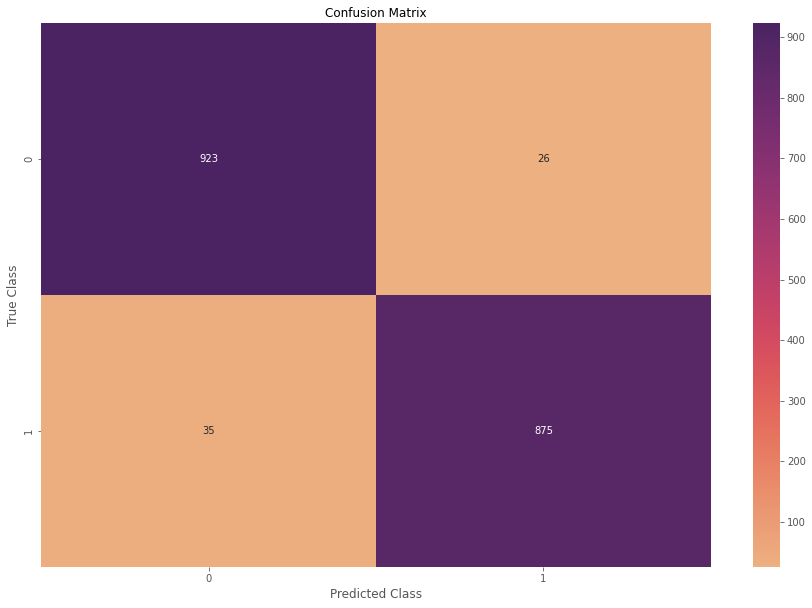

In [0]:
#Visually evaluating the model result
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)

plt.show()